<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-the-pandas,-matplotlib,-and-seaborn-libraries" data-toc-modified-id="Import-the-pandas,-matplotlib,-and-seaborn-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import the pandas, matplotlib, and seaborn libraries</a></span></li><li><span><a href="#View-the-median,-and-first-and-third-quartile-values-for-weeks-worked-for-each-degree-attainment-level" data-toc-modified-id="View-the-median,-and-first-and-third-quartile-values-for-weeks-worked-for-each-degree-attainment-level-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>View the median, and first and third quartile values for weeks worked for each degree attainment level</a></span></li><li><span><a href="#Do-a-boxplot-of-weeks-worked-by-highest-degree-earned" data-toc-modified-id="Do-a-boxplot-of-weeks-worked-by-highest-degree-earned-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Do a boxplot of weeks worked by highest degree earned</a></span></li><li><span><a href="#View-the-minimum,-maximum,-median,-and-first-and-third-quartile-values-for-total-cases-per-million-by-region" data-toc-modified-id="View-the-minimum,-maximum,-median,-and-first-and-third-quartile-values-for-total-cases-per-million-by-region-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>View the minimum, maximum, median, and first and third quartile values for total cases per million by region</a></span></li><li><span><a href="#Do-boxplots-of-cases-per-million-by-region" data-toc-modified-id="Do-boxplots-of-cases-per-million-by-region-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Do boxplots of cases per million by region</a></span></li><li><span><a href="#Show-the-most-extreme-values-for-cases-per-million" data-toc-modified-id="Show-the-most-extreme-values-for-cases-per-million-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Show the most extreme values for cases per million</a></span></li><li><span><a href="#Redo-the-boxplots-without-the-extreme-values" data-toc-modified-id="Redo-the-boxplots-without-the-extreme-values-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Redo the boxplots without the extreme values</a></span></li></ul></div>

# Import the pandas, matplotlib, and seaborn libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# pd.set_option('display.width', 80)
# pd.set_option('display.max_columns', 7)
# pd.set_option('display.max_rows', 200)
# pd.options.display.float_format = '{:,.0f}'.format

In [3]:
import watermark
%load_ext watermark

%watermark -n -i -iv

pandas    : 1.2.1
matplotlib: 3.3.2
watermark : 2.1.0
seaborn   : 0.11.1
json      : 2.0.9



In [4]:
nls97 = pd.read_csv('data/nls97.csv')
nls97.set_index('personid', inplace=True)

In [5]:
covidtotals = pd.read_csv('data/covidtotals.csv', parse_dates=['lastdate'])
covidtotals.set_index('iso_code', inplace=True)

# View the median, and first and third quartile values for weeks worked for each degree attainment level

In [8]:
def gettots(x):
    out = {}
    out['min'] = x.min()
    out['qr1'] = x.quantile(0.25)
    out['med'] = x.median()
    out['qr3'] = x.quantile(0.75)
    out['max'] = x.max()
    out['count'] = x.count()
    return pd.Series(out)

In [9]:
nls97.groupby(['highestdegree'])['weeksworked17'].apply(gettots).unstack()

,min,qr1,med,qr3,max,count
highestdegree,,,,,,
0. None,0.0,0.0,40.0,52.0,52.0,510.0
1. GED,0.0,8.0,47.0,52.0,52.0,848.0
2. High School,0.0,31.0,49.0,52.0,52.0,2665.0
3. Associates,0.0,42.0,49.0,52.0,52.0,593.0
4. Bachelors,0.0,45.0,50.0,52.0,52.0,1342.0
5. Masters,0.0,46.0,50.0,52.0,52.0,538.0
6. PhD,0.0,46.5,50.0,52.0,52.0,51.0
7. Professional,0.0,47.0,50.0,52.0,52.0,97.0


In [12]:
nls97.groupby(['highestdegree'])['weeksworked17'].apply(gettots)

highestdegree         
0. None          min         0.0
                 qr1         0.0
                 med        40.0
                 qr3        52.0
                 max        52.0
                 count     510.0
1. GED           min         0.0
                 qr1         8.0
                 med        47.0
                 qr3        52.0
                 max        52.0
                 count     848.0
2. High School   min         0.0
                 qr1        31.0
                 med        49.0
                 qr3        52.0
                 max        52.0
                 count    2665.0
3. Associates    min         0.0
                 qr1        42.0
                 med        49.0
                 qr3        52.0
                 max        52.0
                 count     593.0
4. Bachelors     min         0.0
                 qr1        45.0
                 med        50.0
                 qr3        52.0
                 max        52.0
                 cou

# Do a boxplot of weeks worked by highest degree earned

D:\ProgramData\Anaconda3\envs\dsn\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


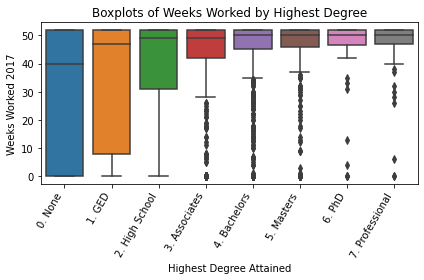

In [13]:
myplt = sns.boxplot('highestdegree',
                    'weeksworked17',
                    data=nls97,
                    order=sorted(nls97['highestdegree'].dropna().unique()))
myplt.set_title('Boxplots of Weeks Worked by Highest Degree')
myplt.set_xlabel('Highest Degree Attained')
myplt.set_ylabel('Weeks Worked 2017')
myplt.set_xticklabels(myplt.get_xticklabels(),
                      rotation=60,
                      horizontalalignment='right')
plt.tight_layout()
plt.show()

# View the minimum, maximum, median, and first and third quartile values for total cases per million by region

In [14]:
covidtotals.groupby(['region'])['total_cases_pm'].apply(gettots).unstack()

,min,qr1,med,qr3,max,count
region,,,,,,
Caribbean,95.035,251.51850,339.0095,1726.15975,4435.327,22.0
Central Africa,14.696,71.09900,367.5180,1538.36600,3317.196,11.0
Central America,93.053,924.54750,1447.8430,2190.56500,10274.481,7.0
Central Asia,373.866,918.89625,1974.4910,2906.75950,10593.831,6.0
East Africa,8.521,65.41800,190.1960,268.91700,5015.172,13.0
East Asia,2.611,15.98500,64.6315,269.34525,7825.695,16.0
Eastern Europe,346.726,882.72775,1189.8350,2317.46025,6854.143,22.0
North Africa,105.342,202.14600,421.0720,426.71700,793.067,5.0
North America,2290.093,2566.99750,2843.9020,6327.77900,9811.656,3.0


# Do boxplots of cases per million by region

D:\ProgramData\Anaconda3\envs\dsn\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


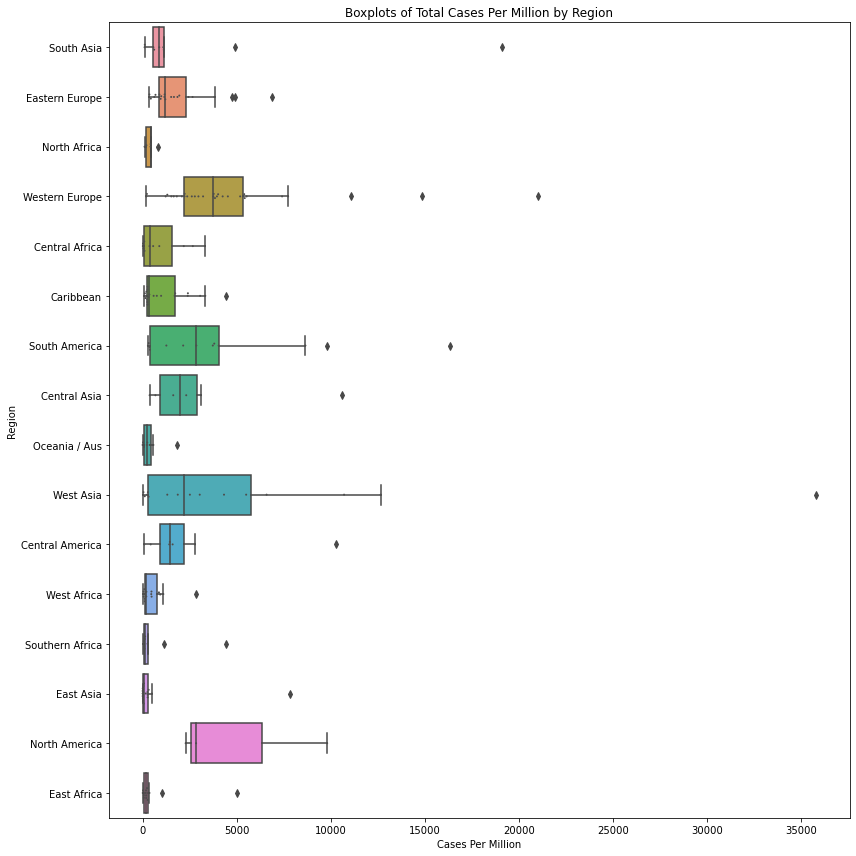

In [20]:
plt.figure(figsize=(12, 12))
sns.boxplot('total_cases_pm', 'region', data=covidtotals)
sns.swarmplot(y='region',
              x='total_cases_pm',
              data=covidtotals,
              size=2,
              color='0.3',
              linewidth=0)
plt.title('Boxplots of Total Cases Per Million by Region')
plt.xlabel('Cases Per Million')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

# Show the most extreme values for cases per million

In [21]:
covidtotals.loc[covidtotals['total_cases_pm'] >= 14000,
                ['location', 'total_cases_pm']]

,location,total_cases_pm
iso_code,,
BHR,Bahrain,19082.231
CHL,Chile,16322.745
QAT,Qatar,35795.159
SMR,San Marino,21038.364
VAT,Vatican,14833.127


# Redo the boxplots without the extreme values

D:\ProgramData\Anaconda3\envs\dsn\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


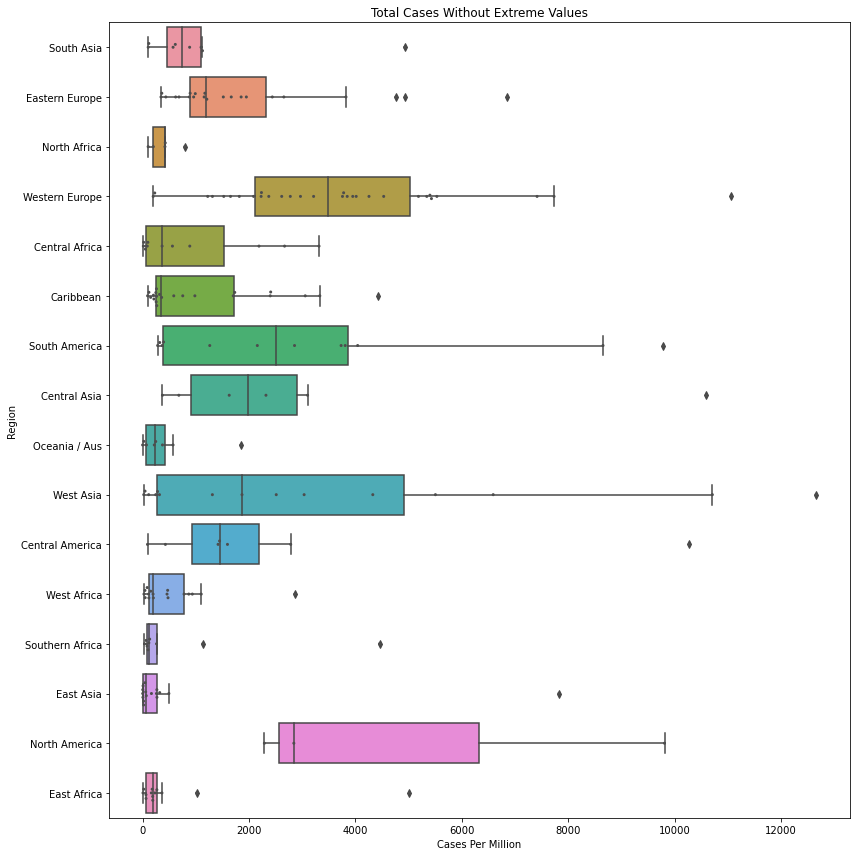

In [24]:
plt.figure(figsize=(12, 12))
sns.boxplot('total_cases_pm',
            'region',
            data=covidtotals.loc[covidtotals['total_cases_pm'] < 14000])
sns.swarmplot(y='region',
              x='total_cases_pm',
              data=covidtotals.loc[covidtotals['total_cases_pm'] < 14000],
              size=3,
              color='0.3',
              linewidth=0)
plt.title('Total Cases Without Extreme Values')
plt.xlabel('Cases Per Million')
plt.ylabel('Region')
plt.tight_layout()
plt.show()